# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import regex as re
from tqdm.notebook import tqdm
import numpy as np

#### Let's get the ratings as well since, it may be hard to judge the correctness of the results of the sentiment analysis models with just the text reviews.  Using an extra quantitative parameter like ratings will allow us/me to have more confidence on the differnt models used for sentiment analysis and make it easier to corroborate the reults obtained from the model. 
#### However, moving forwards we cannot show an overreliance on the ratings as this may prove to be a crutch. Instead we can use other parameters preferably quantitaive ones (labels will help as well) initially to build confidence on the model(s) used and then slowly move away from theese external parameters, once a certain level of confidence is instilled on the model to make the correct judgements from the text based reviews.
 

In [41]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100
ratings = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("span", {"itemprop":"ratingValue"}):
        ratings.append(para.get_text())

    
    print(f"   ---> {len(ratings)} total ratings")




Scraping page 1
   ---> 101 total ratings
Scraping page 2
   ---> 202 total ratings
Scraping page 3
   ---> 303 total ratings
Scraping page 4
   ---> 404 total ratings
Scraping page 5
   ---> 505 total ratings
Scraping page 6
   ---> 606 total ratings
Scraping page 7
   ---> 707 total ratings
Scraping page 8
   ---> 808 total ratings
Scraping page 9
   ---> 909 total ratings
Scraping page 10
   ---> 1010 total ratings


In [48]:
len(ratings)

1010

In [53]:



ratings_filtered = [x for x in ratings if x not in {'\n\t\t\t\t\t\t\t\t\t\t\t\t5'} ]

len(ratings_filtered)


1000

#### The ratings webscrapper saw a recurrcing pattern at the start of each page which contained the overall rating of the airline. Let's remove this from the dataset so that we can merge the ratings and reviews dataset.

In [51]:
df = pd.DataFrame()
df["ratings"] = ratings
df.head()

ratings_df = (df.drop((df.loc[df["ratings"]=='\n\t\t\t\t\t\t\t\t\t\t\t\t5']).index).reset_index()).drop('index',axis=1)
ratings_df.to_csv('ratings.csv')

##### Create a unqiue ID for each row in both datasets to mergre them on.Can manually check a few random samples after merging if the ratings and reviews in the dataset match with what's on the website.


In [71]:
ratings_df['ratings_filtered'] = ratings_filtered
(ratings_df['ratings_filtered'] == ratings_df['ratings']).sum()
ratings_df['ID'] = np.arange(0,1000)
ratings_df.head()

,ratings,ratings_filtered,ID
0,8,8,0
1,1,1,1
2,1,1,2
3,1,1,3
4,9,9,4


In [58]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [70]:
reviews_df = pd.DataFrame()
reviews_df["reviews"] = reviews
reviews_df['ID'] = np.arange(0,1000)
reviews_df.head()

,reviews,ID
0,✅ Trip Verified | Straightforward check in T...,0
1,Not Verified | I am beyond upset and disgusted...,1
2,✅ Trip Verified | I purchased round trip dir...,2
3,Not Verified | I booked two business class sea...,3
4,Not Verified | Although all four flights were ...,4


In [60]:
from pathlib import Path
import os
a = Path.cwd()
a
working_folder = "c:/Users/islam/Downloads/Learn Python/TheForage/BritishAirways"
#os.mkdir('data')
data_path = a/Path('data')
file_name = 'BA_reviews.csv'
file_path = data_path/Path(file_name)
file_path

WindowsPath('c:/Users/islam/Downloads/Learn Python/TheForage/BritishAirways/data/BA_reviews.csv')

In [76]:
df = reviews_df.set_index('ID').join(ratings_df.set_index('ID'))
df.drop('ratings_filtered',axis=1,inplace=True)
df.head()


,reviews,ratings
ID,,
0,✅ Trip Verified | Straightforward check in T...,8
1,Not Verified | I am beyond upset and disgusted...,1
2,✅ Trip Verified | I purchased round trip dir...,1
3,Not Verified | I booked two business class sea...,1
4,Not Verified | Although all four flights were ...,9


In [77]:
df.to_csv(file_path)
df.head()

,reviews,ratings
ID,,
0,✅ Trip Verified | Straightforward check in T...,8
1,Not Verified | I am beyond upset and disgusted...,1
2,✅ Trip Verified | I purchased round trip dir...,1
3,Not Verified | I booked two business class sea...,1
4,Not Verified | Although all four flights were ...,9


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Start from here once you have the Data. No need to start from scarping again. 

In [2]:
from pathlib import Path
import os
a = Path.cwd()
a
#os.mkdir('data')
data_path = a/Path('data')
file_name = 'BA_reviews.csv'
file_path = data_path/Path(file_name)
file_path

WindowsPath('c:/Users/islam/Downloads/Learn Python/TheForage/BritishAirways/data/BA_reviews.csv')

Remove trip verified from the reviews.

In [4]:
df = pd.read_csv(file_path)
df.head(15)
to_replace = ["Not Verified", "✅ Trip Verified", "\|","Verified Review"]
df["reviews"] = df['reviews'].replace(to_replace,"", limit=None, regex=True)

## Basic NLTK






In [5]:
import nltk

In [87]:
example = df['reviews'][50]
print(example)

  We have flown with British Airways a few times but this last trip was by far the worst experience. We weren't able to check in online because the system wouldn't accept any of our passport info, so we had to wait to check in upon arrival at the airport. We arrived two hours before our scheduled departure. The line was backed up with only 4 stations being staffed where there was room for at least 6 more attendants to help expedite check in. We talked to a few people in line and they too were unable to check in online. It took the desk attendants an hour to check in the people ahead of us. We told the agent we had tried to check in online but it wouldn't accept our passports, she replied it was because they need to verify each passport personally. I asked that wouldn't they verify them that way anyway? I also let her know we attempted to move closer to the front of the plane and could see there were seats available but couldn't secure them because we couldn't finish check in. She went 

In [89]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['We',
 'have',
 'flown',
 'with',
 'British',
 'Airways',
 'a',
 'few',
 'times',
 'but']

In [90]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('We', 'PRP'),
 ('have', 'VBP'),
 ('flown', 'VBN'),
 ('with', 'IN'),
 ('British', 'NNP'),
 ('Airways', 'NNP'),
 ('a', 'DT'),
 ('few', 'JJ'),
 ('times', 'NNS'),
 ('but', 'CC')]

In [91]:


entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()



(S
  We/PRP
  have/VBP
  flown/VBN
  with/IN
  (GPE British/NNP)
  Airways/NNP
  a/DT
  few/JJ
  times/NNS
  but/CC
  this/DT
  last/JJ
  trip/NN
  was/VBD
  by/IN
  far/RB
  the/DT
  worst/JJS
  experience/NN
  ./.
  We/PRP
  were/VBD
  n't/RB
  able/JJ
  to/TO
  check/VB
  in/IN
  online/NN
  because/IN
  the/DT
  system/NN
  would/MD
  n't/RB
  accept/VB
  any/DT
  of/IN
  our/PRP$
  passport/NN
  info/NN
  ,/,
  so/IN
  we/PRP
  had/VBD
  to/TO
  wait/VB
  to/TO
  check/VB
  in/IN
  upon/JJ
  arrival/NN
  at/IN
  the/DT
  airport/NN
  ./.
  We/PRP
  arrived/VBD
  two/CD
  hours/NNS
  before/IN
  our/PRP$
  scheduled/JJ
  departure/NN
  ./.
  The/DT
  line/NN
  was/VBD
  backed/VBN
  up/RP
  with/IN
  only/RB
  4/CD
  stations/NNS
  being/VBG
  staffed/VBN
  where/WRB
  there/EX
  was/VBD
  room/NN
  for/IN
  at/IN
  least/JJS
  6/CD
  more/JJR
  attendants/NNS
  to/TO
  help/VB
  expedite/VB
  check/NN
  in/IN
  ./.
  We/PRP
  talked/VBD
  to/TO
  a/DT
  few/JJ
  people/NNS
  in/IN


## VADER Seniment Scoring without filtering the stopwords, 

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

    This uses a "bag of words" approach:
<ol> Stop words are removed </ol>
<ol> each word is scored and combined to a total score. </ol>



In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [7]:


sia.polarity_scores('I am so happy!')



{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [95]:


sia.polarity_scores('This is the worst thing ever.')



{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [96]:


sia.polarity_scores(example)



{'neg': 0.094, 'neu': 0.874, 'pos': 0.032, 'compound': -0.9815}

In [8]:


# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['reviews']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)



  0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:


vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')



In [10]:


# Now we have sentiment score and metadata
vaders.head()



,ID,neg,neu,pos,compound,reviews,ratings
0,0,0.042,0.783,0.174,0.8793,Straightforward check in T5. New site for ...,8
1,1,0.135,0.832,0.034,-0.9942,I am beyond upset and disgusted with the dis...,1
2,2,0.056,0.938,0.006,-0.8155,I purchased round trip direct flight busin...,1
3,3,0.081,0.888,0.030,-0.4019,I booked two business class seats. We had a ...,1
4,4,0.029,0.769,0.201,0.9039,Although all four flights were delayed the s...,9


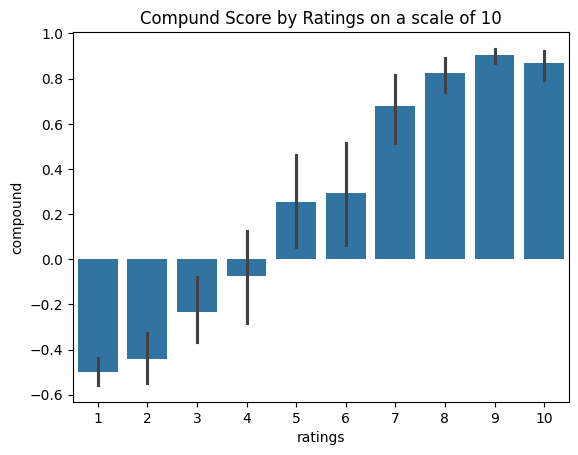

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.barplot(data=vaders, x='ratings', y='compound')
ax.set_title('Compund Score by Ratings on a scale of 10')
plt.show()



## Preprocess the Review Column

In [12]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [20]:
#nltk.download('stopwords')
#nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = []

In [32]:
stop_words_upper = []
stop_words_upper  = [word.upper() for word in stop_words]

In [34]:
def preprocess_reviews(review, custom_stopwords):
    processed_review = review
    processed_review.replace('[^\w\s]', '')
    processed_review = " ".join(word for word in processed_review.split() if word not in stop_words)
    processed_review = " ".join(word for word in processed_review.split() if word not in stop_words_upper)
    processed_review = " ".join(word for word in processed_review.split() if word not in custom_stopwords)
    processed_review = " ".join(Word(word).lemmatize() for word in processed_review.split())
    return(processed_review)

df['Processed review'] = df['reviews'].apply(lambda x: preprocess_reviews(x, custom_stopwords))
df.head()

,ID,reviews,ratings,Processed review
0,0,Straightforward check in T5. New site for ...,8,Straightforward check T5. New site club check ...
1,1,I am beyond upset and disgusted with the dis...,1,"beyond upset disgusted disregard, lack knowled..."
2,2,I purchased round trip direct flight busin...,1,purchased round trip direct flight business cl...
3,3,I booked two business class seats. We had a ...,1,booked two business class seats. We medical em...
4,4,Although all four flights were delayed the s...,9,Although four flight delayed service offered B...


## Calculate Sentiment using textblob

In [35]:
# copy once no need to do it again 
#textblob_df = df.copy()
textblob_df = df.copy()

In [36]:
# Calculate polarity

textblob_df['polarity'] = textblob_df['Processed review'].apply(lambda x: TextBlob(x).sentiment[0])
textblob_df['subjectivity'] = textblob_df['Processed review'].apply(lambda x: TextBlob(x).sentiment[1])


In [37]:
textblob_df.head()

,ID,reviews,ratings,Processed review,polarity,subjectivity
0,0,Straightforward check in T5. New site for ...,8,Straightforward check T5. New site club check ...,0.253725,0.423295
1,1,I am beyond upset and disgusted with the dis...,1,"beyond upset disgusted disregard, lack knowled...",-0.041477,0.432055
2,2,I purchased round trip direct flight busin...,1,purchased round trip direct flight business cl...,0.063636,0.320455
3,3,I booked two business class seats. We had a ...,1,booked two business class seats. We medical em...,0.083333,0.319444
4,4,Although all four flights were delayed the s...,9,Although four flight delayed service offered B...,0.445833,0.537500


In [113]:
import numpy as np
display(textblob_df[['polarity','subjectivity']].agg(['mean', 'max', 'min', 'median']))



,polarity,subjectivity
mean,0.06519,0.476000
max,0.80000,1.000000
min,-1.00000,0.000000
median,0.05000,0.479051


In [55]:
results_dict = {'mean_polarity':textblob_df['polarity'].mean(),
                'max_polarity':textblob_df['polarity'].max(),
                'min_polarity':textblob_df['polarity'].min(),
                'median_polarity':textblob_df['polarity'].median()}
results_dict

{'mean_polarity': 0.0684178900056214,
 'max_polarity': 0.8,
 'min_polarity': -0.7666666666666666,
 'median_polarity': 0.06512303485987697}

Don't think the sentiment analysis with textblob offered any significant insight so will move onto VADER and ROBERTA for sentiment analysis. 

## VADER Sentiment Analysis using preprocessed words


In [39]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Processed review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [40]:
vader_df = df.copy()
df.head()

,ID,reviews,ratings,Processed review
0,0,Straightforward check in T5. New site for ...,8,Straightforward check T5. New site club check ...
1,1,I am beyond upset and disgusted with the dis...,1,"beyond upset disgusted disregard, lack knowled..."
2,2,I purchased round trip direct flight busin...,1,purchased round trip direct flight business cl...
3,3,I booked two business class seats. We had a ...,1,booked two business class seats. We medical em...
4,4,Although all four flights were delayed the s...,9,Although four flight delayed service offered B...


In [41]:
vaders_results = pd.DataFrame(res).T
vaders_results = vaders_results.reset_index().rename(columns={'index': 'ID'})
vaders_results = vaders_results.merge(df, how='left')

Text(0.5, 1.0, 'Compund Score by Ratings (Raw Text)')

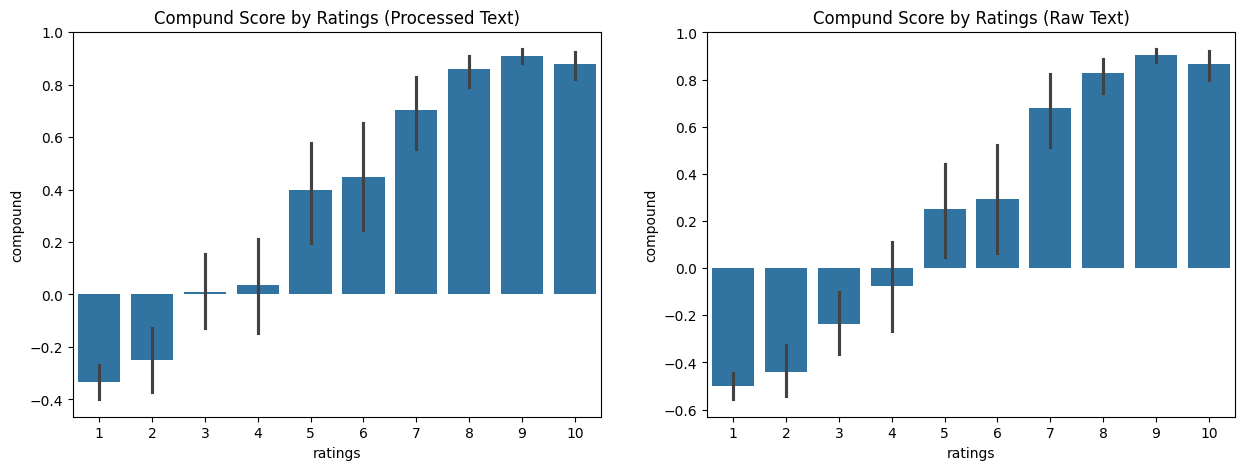

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(ax=ax[0], data=vaders_results, x='ratings', y='compound')
ax[0].set_title('Compund Score by Ratings (Processed Text)')

sns.barplot(ax=ax[1], data=vaders, x='ratings', y='compound')
ax[1].set_title('Compund Score by Ratings (Raw Text)')

#plt.show()


In [43]:
vaders_results['ratings'].sort_values().value_counts(sort=False)

ratings
1     376
2     114
3      95
4      56
5      45
6      35
7      40
8      78
9      76
10     85
Name: count, dtype: int64

In [45]:
vaders_results.loc[(vaders_results['compound']>0.2) & ( (vaders_results['ratings']>=1) & (vaders_results['ratings']<=4) )].sort_values(['ratings','compound'],ascending=[True,False])

,ID,neg,neu,pos,compound,reviews,ratings,Processed review
615,615,0.033,0.825,0.142,0.9615,Straightforward and friendly baggage drop. ...,1,Straightforward friendly baggage drop. On Sout...
241,241,0.051,0.842,0.107,0.9581,Terrible Experience with British Airways. I ...,1,Terrible Experience British Airways. booked fl...
508,508,0.114,0.725,0.161,0.9464,"BA cancelled my flight, I never got on it, ...",1,"BA cancelled flight, never got it, book anothe..."
515,515,0.062,0.724,0.214,0.9436,I could very much understand losing my lugg...,1,could much understand losing luggage 8 day air...
67,67,0.079,0.790,0.131,0.9422,We booked premium economy round trip from P...,1,We booked premium economy round trip Phoenix Z...
...,...,...,...,...,...,...,...,...
645,645,0.050,0.837,0.113,0.4404,Poorly mismanaged services this time. Disap...,4,Poorly mismanaged service time. Disappointed h...
178,178,0.053,0.852,0.095,0.4197,Flew with BA to Punta Cana. Took the troubl...,4,Flew BA Punta Cana. Took trouble reserve seat ...
432,432,0.104,0.758,0.138,0.3057,Flew from Amman to London on Nov. 14 2022. N...,4,Flew Amman London Nov. 14 2022. Not sure type ...
387,387,0.279,0.426,0.294,0.2516,Check in agent at LHR was very helpful and f...,4,Check agent LHR helpful friendly flight crew. ...


In [46]:
vaders.loc[(vaders['compound']>0) & ( (vaders['ratings']>=1) & (vaders['ratings']<=4) )].sort_values(['ratings','compound'],ascending=[True,False])

,ID,neg,neu,pos,compound,reviews,ratings
515,515,0.045,0.828,0.127,0.9630,I could very much understand losing my lugg...,1
862,862,0.045,0.862,0.093,0.9586,London to Cape Town. We had booked business...,1
46,46,0.051,0.843,0.106,0.9350,I strongly advise everyone to never fly Brit...,1
48,48,0.098,0.773,0.128,0.9034,We had a Premium Economy return flight Los ...,1
744,744,0.019,0.916,0.065,0.9033,I flew to Vancouver mid March to see my mot...,1
...,...,...,...,...,...,...,...
258,258,0.037,0.849,0.114,0.4404,BA is not treating its premium economy passe...,4
387,387,0.203,0.578,0.219,0.3774,Check in agent at LHR was very helpful and f...,4
247,247,0.077,0.855,0.068,0.2598,Flight was delayed due to the inbound fligh...,4
74,74,0.117,0.783,0.100,0.2040,Flew business class from Doha to London on ...,4


## Hugging Face pre-trained transformer model (ROBERTA)

In [48]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [49]:

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


c:\Users\islam\anaconda3\envs\ComputerVision\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [195]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.87970924, 'roberta_neu': 0.10969991, 'roberta_pos': 0.0105909165}


In [50]:
df.head()

,ID,reviews,ratings,Processed review
0,0,Straightforward check in T5. New site for ...,8,Straightforward check T5. New site club check ...
1,1,I am beyond upset and disgusted with the dis...,1,"beyond upset disgusted disregard, lack knowled..."
2,2,I purchased round trip direct flight busin...,1,purchased round trip direct flight business cl...
3,3,I booked two business class seats. We had a ...,1,booked two business class seats. We medical em...
4,4,Although all four flights were delayed the s...,9,Although four flight delayed service offered B...


In [51]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict


res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Processed review']
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/1000 [00:00<?, ?it/s]

In [52]:




results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how='left')

results_df.to_csv('results.csv')
    

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('results.csv',index_col=0)

In [4]:
df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,reviews,ratings,Processed review
0,0,0.047,0.743,0.211,0.8176,0.011526,0.173503,0.814971,Straightforward check in T5. New site for ...,8,Straightforward check T5. New site club check ...
1,1,0.184,0.738,0.077,-0.9842,0.826966,0.162322,0.010712,I am beyond upset and disgusted with the dis...,1,"beyond upset disgusted disregard, lack knowled..."
2,2,0.103,0.884,0.013,-0.8332,0.666098,0.310309,0.023593,I purchased round trip direct flight busin...,1,purchased round trip direct flight business cl...
3,3,0.128,0.810,0.061,-0.3400,0.508393,0.453531,0.038076,I booked two business class seats. We had a ...,1,booked two business class seats. We medical em...
4,4,0.042,0.667,0.291,0.9039,0.012821,0.101204,0.885975,Although all four flights were delayed the s...,9,Although four flight delayed service offered B...


Let's see some simple statistical measures below. 

In [6]:
df[['vader_pos','vader_neu','vader_neg','roberta_neg','roberta_pos','roberta_neu']].agg(['mean','median','std'])

,vader_pos,vader_neu,vader_neg,roberta_neg,roberta_pos,roberta_neu
mean,0.156898,0.727213,0.115876,0.442812,0.294552,0.262636
median,0.125000,0.738000,0.105000,0.473869,0.088586,0.243009
std,0.119986,0.102872,0.082495,0.337474,0.346846,0.166821


## Data Visualisation

In [7]:
df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,reviews,ratings,Processed review
0,0,0.047,0.743,0.211,0.8176,0.011526,0.173503,0.814971,Straightforward check in T5. New site for ...,8,Straightforward check T5. New site club check ...
1,1,0.184,0.738,0.077,-0.9842,0.826966,0.162322,0.010712,I am beyond upset and disgusted with the dis...,1,"beyond upset disgusted disregard, lack knowled..."
2,2,0.103,0.884,0.013,-0.8332,0.666098,0.310309,0.023593,I purchased round trip direct flight busin...,1,purchased round trip direct flight business cl...
3,3,0.128,0.810,0.061,-0.3400,0.508393,0.453531,0.038076,I booked two business class seats. We had a ...,1,booked two business class seats. We medical em...
4,4,0.042,0.667,0.291,0.9039,0.012821,0.101204,0.885975,Although all four flights were delayed the s...,9,Although four flight delayed service offered B...


In [82]:
#results_df_copy = results_df.copy()

In [8]:
def vader_sentiment(compound_score):
    if compound_score >= 0.5:
        return 'Positive'
    elif compound_score < 0:
        return 'Negative'
    else:
        return "Neutral"
    
df['VADER_Sentiment'] = df['vader_compound'].apply(vader_sentiment)

def roberta_sentiment(score):
    if (score[0] >score[1]) & (score[0] >score[2]):
        return 'Positive'
    elif (score[1] >score[0]) & (score[1]>score[2]):
        return 'Negative'
    else:
        return "Neutral"


#Use lambda function to label tweet as positive, negative or neutral
df['ROBERTA_Sentiment'] = df.apply(lambda x:'Negative' if x['roberta_neg'] >
                     x['roberta_neu'] and x['roberta_neu']
                     > x['roberta_pos'] else ('Neutral' if x['roberta_neu']>x['roberta_pos'] else 'Positive'),axis=1)
df['ROBERTA_Sentiment'].head()



0    Positive
1    Negative
2    Negative
3    Negative
4    Positive
Name: ROBERTA_Sentiment, dtype: object

In [9]:
df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,reviews,ratings,Processed review,VADER_Sentiment,ROBERTA_Sentiment
0,0,0.047,0.743,0.211,0.8176,0.011526,0.173503,0.814971,Straightforward check in T5. New site for ...,8,Straightforward check T5. New site club check ...,Positive,Positive
1,1,0.184,0.738,0.077,-0.9842,0.826966,0.162322,0.010712,I am beyond upset and disgusted with the dis...,1,"beyond upset disgusted disregard, lack knowled...",Negative,Negative
2,2,0.103,0.884,0.013,-0.8332,0.666098,0.310309,0.023593,I purchased round trip direct flight busin...,1,purchased round trip direct flight business cl...,Negative,Negative
3,3,0.128,0.810,0.061,-0.3400,0.508393,0.453531,0.038076,I booked two business class seats. We had a ...,1,booked two business class seats. We medical em...,Negative,Negative
4,4,0.042,0.667,0.291,0.9039,0.012821,0.101204,0.885975,Although all four flights were delayed the s...,9,Although four flight delayed service offered B...,Positive,Positive


In [10]:
Vader_counts = df['VADER_Sentiment'].value_counts()
Vader_counts

VADER_Sentiment
Positive    449
Negative    449
Neutral     102
Name: count, dtype: int64

In [11]:
Roberta_counts = df['ROBERTA_Sentiment'].value_counts()
Roberta_counts

ROBERTA_Sentiment
Negative    520
Positive    301
Neutral     179
Name: count, dtype: int64

<Axes: title={'center': 'Customer sentiment based on reviews'}>

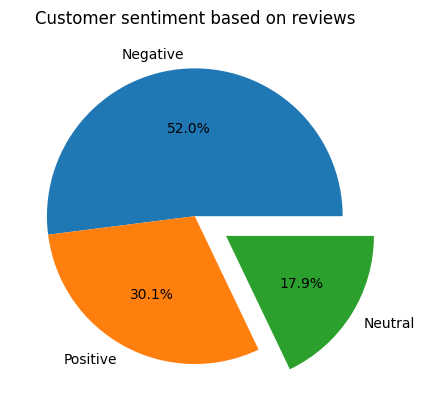

In [29]:
Roberta_counts.plot(kind='pie', explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False,ylabel='',title='Customer sentiment based on reviews')

C:\Users\islam\AppData\Local\Temp\ipykernel_16652\3809809069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Vader_counts,palette='Set2')
C:\Users\islam\AppData\Local\Temp\ipykernel_16652\3809809069.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Roberta_counts ,palette="Set2",legend=True)


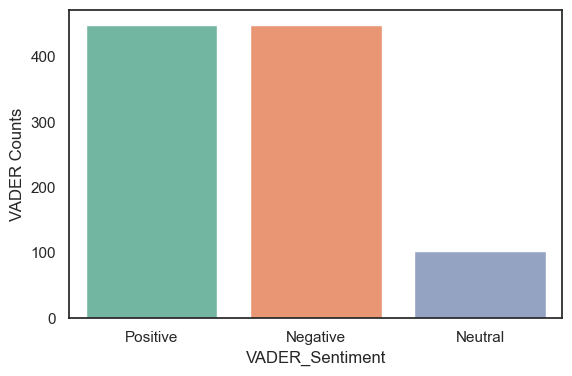

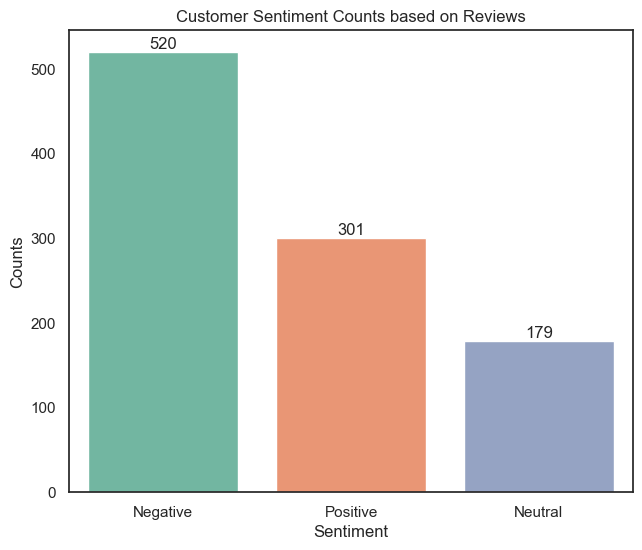

In [45]:
palette = ["#fee090", "#fdae61", "#4575b4"]

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.set_theme(style="white")
ax = sns.barplot(data=Vader_counts,palette='Set2')
ax.set_ylabel('VADER Counts')

plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
sns.set_theme(style="white")
ax = sns.barplot(data=Roberta_counts ,palette="Set2",legend=True)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Counts')
ax.set_title('Customer Sentiment Counts based on Reviews')
ax.get_xaxis
for i in ax.containers:
    ax.bar_label(i,)

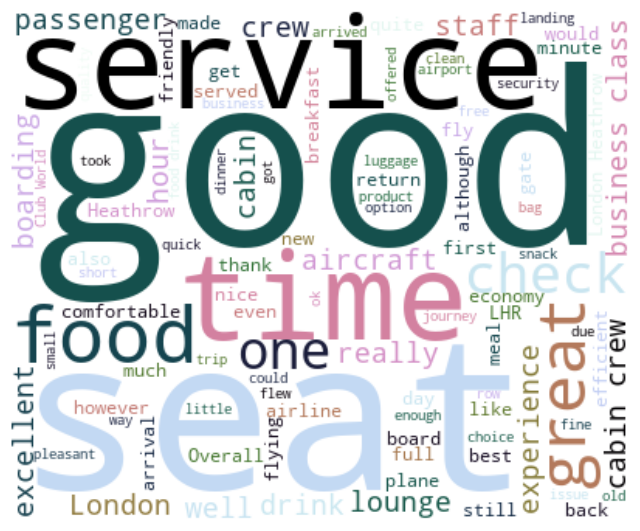

In [47]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
%matplotlib inline

stop_words = stopwords.words('english')
stop_words_upper = []
stop_words_upper  = [word.upper() for word in stop_words]

positve_sent_df = df.loc[df['ROBERTA_Sentiment']=='Positive']
wordcloud_words = positve_sent_df['Processed review'].str.cat(sep=' ')
StopWords = set(nltk.corpus.stopwords.words('english'))
StopWords.update([
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
    'u', 'v', 'w', 'x', 'y', 'z',  # lowercase
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z'  # uppercase
    
    # Punctuation
    '.', ',', ';', ':', '!', '?', '(', ')', '[', ']', '{', '}', '-', '—', '...', '’', '“', '”', '‘', '’', '``', "''",

    # Common stopwords for this instance that may not offer any significant value in the wordcloud visualisation
    'BA','British Airway', 'British', 'Airway','Airways','airways','airway','flight'
])
StopWords.update(stop_words_upper)

wc = WordCloud(width=400, height=330, max_words=100, colormap="cubehelix",background_color='white', stopwords=StopWords).generate(wordcloud_words)
plt.figure(figsize=(8,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

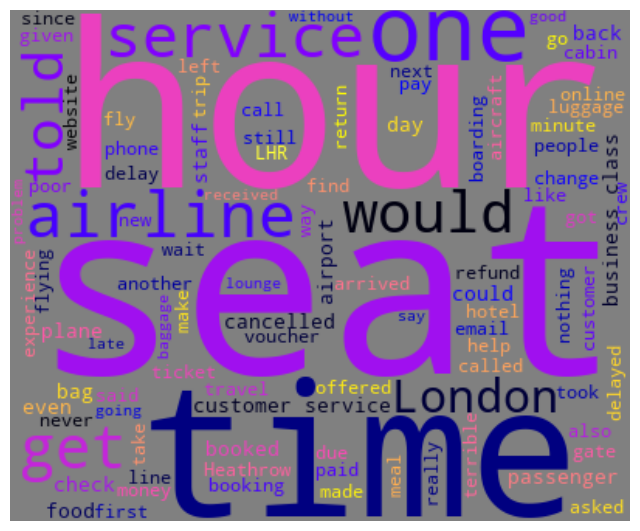

In [58]:
negative_sent_df = df.loc[df['ROBERTA_Sentiment']=='Negative']

wordcloud_words = negative_sent_df['Processed review'].str.cat(sep=' ')
StopWords = set(nltk.corpus.stopwords.words('english'))
StopWords.update([
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
    'u', 'v', 'w', 'x', 'y', 'z',  # lowercase
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z'  # uppercase
    
    # Punctuation
    '.', ',', ';', ':', '!', '?', '(', ')', '[', ']', '{', '}', '-', '—', '...', '’', '“', '”', '‘', '’', '``', "''",

    # Common stopwords for this instance that may not offer any significant value in the wordcloud visualisation
    'BA','British Airway', 'British', 'Airway','Airways','airways','airway','flight'
])
StopWords.update(stop_words_upper)

wc = WordCloud(width=400, height=330, max_words=100, colormap="gnuplot2",background_color='gray', stopwords=StopWords).generate(wordcloud_words)
plt.figure(figsize=(8,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()